## **Лабораторная работа №7**

**Столбцы датасета и их пояснение:**

**Date** - Дата, на которую относятся данные. Эта характеристика указывает конкретный день, в который происходила торговля акциями Walmart.

**Open** - Цена открытия. Стоимость акций Walmart в начале торгового дня. Это важный показатель, который показывает, по какой цене начались торги в конкретный день, и часто используется для сравнения с ценой закрытия для определения дневного тренда.

**High** - Максимальная цена за день. Наибольшая цена, достигнутая акциями Walmart в течение торгового дня. Эта характеристика указывает, какой была самая высокая стоимость акций за день.

**Low** - Минимальная цена за день. Наименьшая цена, по которой торговались акции Walmart в течение дня.

**Close** - Цена закрытия. Стоимость акций Walmart в конце торгового дня. Цена закрытия — один из основных показателей, используемых для анализа акций, так как она отображает итоговую стоимость акций за день и часто используется для расчета дневных изменений и трендов на длительных временных периодах.

**Adj Close** - Скорректированная цена закрытия. Цена закрытия, скорректированная с учетом всех корпоративных действий.

**Volume** - Объем торгов. Количество акций Walmart, проданных и купленных в течение дня. 

**Выгружаем данные**

In [18]:
import pandas as pd

df = pd.read_csv("..//static//csv//WMT.csv")

print(df.head())
print(df.columns)
display(df.head(15))
print(df.isnull().sum())  

print("\nМаксимальные значения по каждому столбцу:")
print(df.max())

print("\Минимальные значения по каждому столбцу:")
print(df.min())

         Date      Open      High       Low     Close  Adj Close   Volume
0  1972-08-25  0.021159  0.021566  0.021159  0.021484   0.011664  7526400
1  1972-08-28  0.021484  0.021647  0.021403  0.021403   0.011620  2918400
2  1972-08-29  0.021322  0.021322  0.021159  0.021159   0.011488  5836800
3  1972-08-30  0.021159  0.021159  0.020996  0.021159   0.011488  1228800
4  1972-08-31  0.020996  0.020996  0.020833  0.020833   0.011311  2611200
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Date      Open      High       Low     Close  Adj Close   Volume
0   1972-08-25  0.021159  0.021566  0.021159  0.021484   0.011664  7526400
1   1972-08-28  0.021484  0.021647  0.021403  0.021403   0.011620  2918400
2   1972-08-29  0.021322  0.021322  0.021159  0.021159   0.011488  5836800
3   1972-08-30  0.021159  0.021159  0.020996  0.021159   0.011488  1228800
4   1972-08-31  0.020996  0.020996  0.020833  0.020833   0.011311  2611200
5   1972-09-01  0.020915  0.020996  0.020915  0.020996   0.011400   768000
6   1972-09-05  0.020996  0.020996  0.020833  0.020833   0.011311  1689600
7   1972-09-06  0.020996  0.020996  0.020996  0.020996   0.011400   768000
8   1972-09-07  0.020996  0.020996  0.020915  0.020915   0.011356  3532800
9   1972-09-08  0.020833  0.020833  0.020752  0.020752   0.011267  1996800
10  1972-09-11  0.020915  0.020915  0.020915  0.020915   0.011356  2764800
11  1972-09-12  0.020915  0.020915  0.020915  0.020915   0.011356  1843200
12  1972-09-13  0.020915  0.020915  0.020915  0.020915   0.011356   460800
13  1972-09-14  0.020915  0.021077  0.020833  0.021077   0.011443  3840000
14  1972-09-15  0.020996  0.020996  0.020915  0.020915   0.011356  1536000

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Максимальные значения по каждому столбцу:
Date         2024-10-14
Open          81.040001
High          81.599998
Low               80.68
Close         81.400002
Adj Close     81.400002
Volume        395500800
dtype: object
\Минимальные значения по каждому столбцу:
Date         1972-08-25
Open           0.005208
High           0.005208
Low            0.004801
Close          0.005208
Adj Close      0.002845
Volume                0
dtype: object


## Выбор входных и выходных переменных

Входные переменные будут Open (цена открытия) и Volume (объем торгов)

Выходная переменная - Close (цена закрытия)

## Настройка параметров лингвистических переменных

Термы: Low, Medium, High

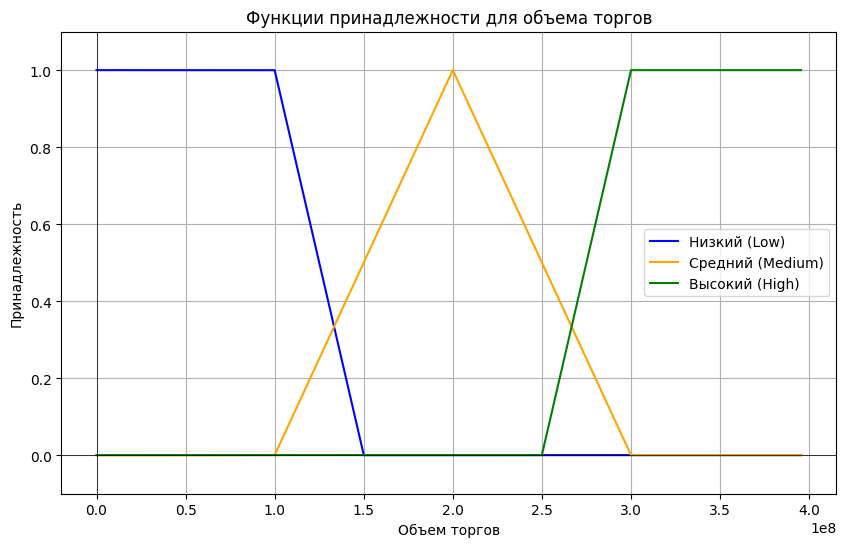

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Минимальные и максимальные значения из данных
volume_max = 395500800

# Определяем диапазон значений для объема торгов
volume_range = np.arange(0, volume_max, 10000)  

# Определение функций принадлежности для термов
# Определение функций принадлежности для термов
low = fuzz.trapmf(volume_range, [0, 0, 100000000, 150000000])  
medium = fuzz.trimf(volume_range, [100000000, 200000000, 300000000])  
high = fuzz.trapmf(volume_range, [250000000, 300000000, volume_max, volume_max])  

# Визуализация функций принадлежности
plt.figure(figsize=(10, 6))
plt.plot(volume_range, low, label='Низкий (Low)', color='blue')
plt.plot(volume_range, medium, label='Средний (Medium)', color='orange')
plt.plot(volume_range, high, label='Высокий (High)', color='green')
plt.title('Функции принадлежности для объема торгов')
plt.xlabel('Объем торгов')
plt.ylabel('Принадлежность')
plt.ylim(-0.1, 1.1)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.grid()

# Отображаем график
plt.show()

## Формирование базы нечетких правил

Нечеткие правила:
Если Цена открытия Низкая И Объем Низкий, Тогда Цена закрытия Низкая.
Если Цена открытия Низкая И Объем Средний, Тогда Цена закрытия Средняя.
Если Цена открытия Низкая И Объем Высокий, Тогда Цена закрытия Средняя.
Если Цена открытия Средняя И Объем Низкий, Тогда Цена закрытия Средняя.
Если Цена открытия Средняя И Объем Средний, Тогда Цена закрытия Высокая.
Если Цена открытия Средняя И Объем Высокий, Тогда Цена закрытия Высокая.
Если Цена открытия Высокая И Объем Низкий, Тогда Цена закрытия Средняя.
Если Цена открытия Высокая И Объем Средний, Тогда Цена закрытия Высокая.
Если Цена открытия Высокая И Объем Высокий, Тогда Цена закрытия Высокая.


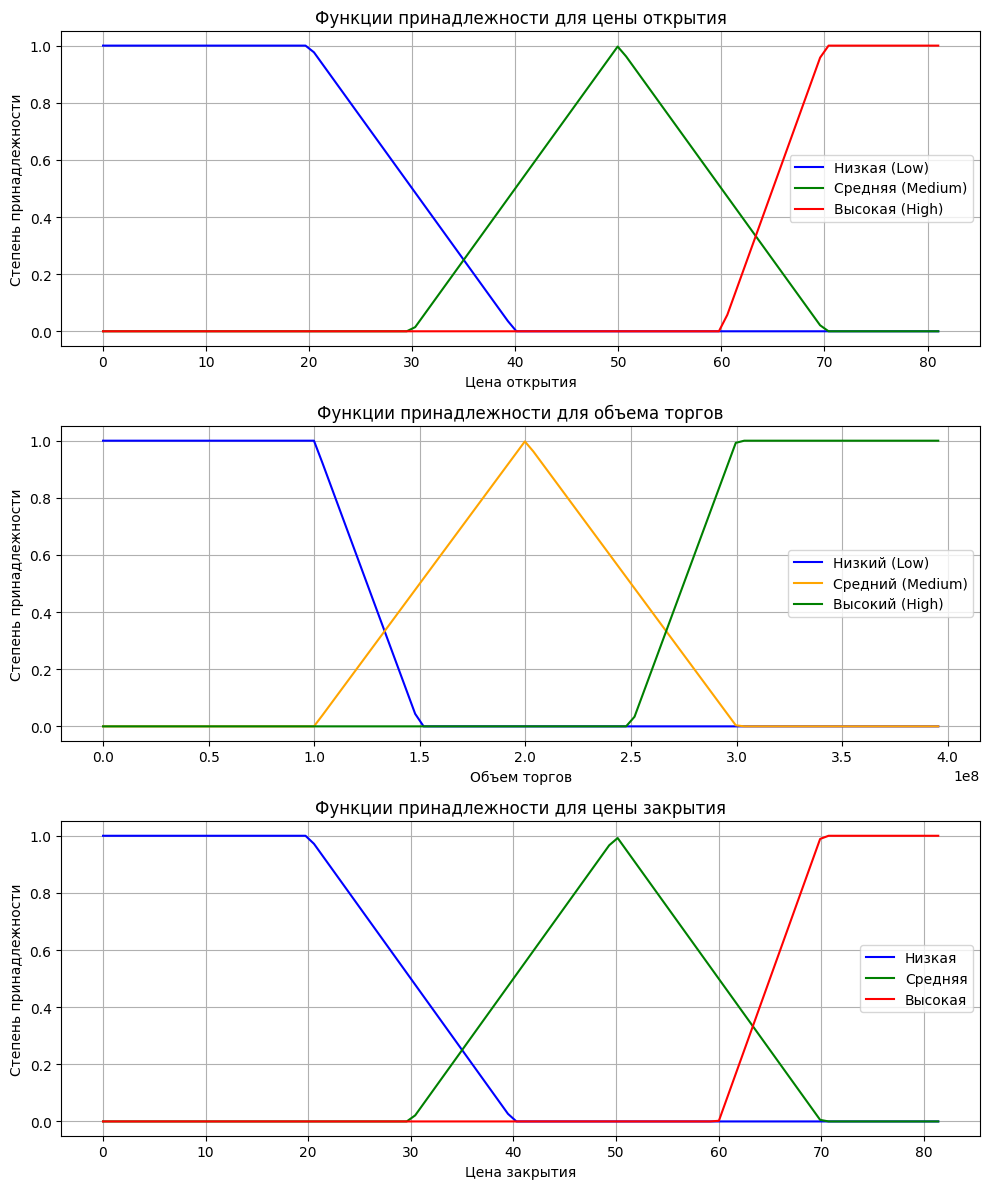

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Минимальные и максимальные значения из данных
open_min = 0.005208
open_max = 81.040001
volume_min = 0
close_min = 0.005208
close_max = 81.400002

# Определение диапазонов для переменных
x_open = np.linspace(open_min, open_max, 100)  # Диапазон для цены открытия
x_volume = np.linspace(volume_min, volume_max, 100)  # Диапазон для объема торгов
x_close = np.linspace(close_min, close_max, 100)  # Диапазон для цены закрытия

# Определение функций принадлежности для цены открытия
low_open = fuzz.trapmf(x_open, [open_min, open_min, 20, 40])  # Низкая цена открытия
medium_open = fuzz.trimf(x_open, [30, 50, 70])  # Средняя цена открытия
high_open = fuzz.trapmf(x_open, [60, 70, open_max, open_max])  # Высокая цена открытия

# Определение функций принадлежности для объема торгов
low_volume = fuzz.trapmf(x_volume, [volume_min, volume_min, 100000000, 150000000])  # Низкий объем
medium_volume = fuzz.trimf(x_volume, [100000000, 200000000, 300000000])  # Средний объем
high_volume = fuzz.trapmf(x_volume, [250000000, 300000000, volume_max, volume_max])  # Высокий объем

# Определение функций принадлежности для цены закрытия
low_close = fuzz.trapmf(x_close, [close_min, close_min, 20, 40])  # Низкая цена закрытия
medium_close = fuzz.trimf(x_close, [30, 50, 70])  # Средняя цена закрытия
high_close = fuzz.trapmf(x_close, [60, 70, close_max, close_max])  # Высокая цена закрытия

# Определение нечетких правил
fuzzy_rules = [
    ("Низкая", "Низкий", "Низкая"),
    ("Низкая", "Средний", "Средняя"),
    ("Низкая", "Высокий", "Средняя"),
    ("Средняя", "Низкий", "Средняя"),
    ("Средняя", "Средний", "Высокая"),
    ("Средняя", "Высокий", "Высокая"),
    ("Высокая", "Низкий", "Средняя"),
    ("Высокая", "Средний", "Высокая"),
    ("Высокая", "Высокий", "Высокая"),
]

# Вывод правил
print("Нечеткие правила:")
for rule in fuzzy_rules:
    print(f"Если Цена открытия {rule[0]} И Объем {rule[1]}, Тогда Цена закрытия {rule[2]}.")

# Визуализация функций принадлежности
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Цена открытия
axs[0].plot(x_open, low_open, label='Низкая (Low)', color='blue')
axs[0].plot(x_open, medium_open, label='Средняя (Medium)', color='green')
axs[0].plot(x_open, high_open, label='Высокая (High)', color='red')
axs[0].set_title('Функции принадлежности для цены открытия')
axs[0].set_xlabel('Цена открытия')
axs[0].set_ylabel('Степень принадлежности')
axs[0].legend()
axs[0].grid()

# Объем торгов
axs[1].plot(x_volume, low_volume, label='Низкий (Low)', color='blue')
axs[1].plot(x_volume, medium_volume, label='Средний (Medium)', color='orange')
axs[1].plot(x_volume, high_volume, label='Высокий (High)', color='green')
axs[1].set_title('Функции принадлежности для объема торгов')
axs[1].set_xlabel('Объем торгов')
axs[1].set_ylabel('Степень принадлежности')
axs[1].legend()
axs[1].grid()

# Цена закрытия
axs[2].plot(x_close, low_close, label='Низкая', color='blue')
axs[2].plot(x_close, medium_close, label='Средняя', color='green')
axs[2].plot(x_close, high_close, label='Высокая', color='red')
axs[2].set_title('Функции принадлежности для цены закрытия')
axs[2].set_xlabel('Цена закрытия')
axs[2].set_ylabel('Степень принадлежности')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

# Визуализация нечетких правил (пример)
fig, ax = plt.subplots(figsize=(10, 6))
x_rule = np.linspace(open_min, open_max, 100)

# Пример нечеткого вывода для визуализации (примерные значения)
for rule in fuzzy_rules:
    # Определение степени уверенности для каждого правила
    if rule[0] == "Низкая" and rule[1] == "Низкий":
        ax.fill_between(x_open, low_open, low_close, color='lightblue', alpha=0.5, label='Низкий #1')
    elif rule[0] == "Низкая" and rule[1] == "Средний":
        ax.fill_between(x_open, medium_open, medium_close, color='lightgreen', alpha=0.5, label='Средний #2')
    elif rule[0] == "Низкая" and rule[1] == "Высокий":
        ax.fill_between(x_open, low_open, medium_close, color='lightcoral', alpha=0.5, label='Высокий #3')
    elif rule[0] == "Средняя" and rule[1] == "Низкий":
        ax.fill_between(x_open, medium_open, medium_close, color='orange', alpha=0.5, label='Низкий #4')
    elif rule[0] == "Высокая" and rule[1] == "Высокий":
        ax.fill_between(x_open, high_open, high_close, color='salmon', alpha=0.5, label='Высокий #5')

ax.set_title('Визуализация нечетких правил')
ax.set_xlabel('Цена открытия')
ax.set_ylabel('Цена закрытия')
ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

## Оценка качества полученной нечеткой системы, используя метрики регрессии

In [22]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Определение диапазонов для переменных
x_open = np.linspace(open_min, open_max, 100)  # Диапазон для цены открытия
x_volume = np.linspace(volume_min, volume_max, 100)  # Диапазон для объема торгов
x_close = np.linspace(close_min, close_max, 100)  # Диапазон для цены закрытия

# Определение функций принадлежности для цены открытия
low_open = fuzz.trapmf(x_open, [open_min, open_min, 20, 40])  # Низкая цена открытия
medium_open = fuzz.trimf(x_open, [30, 50, 70])  # Средняя цена открытия
high_open = fuzz.trapmf(x_open, [60, 70, open_max, open_max])  # Высокая цена открытия

# Определение функций принадлежности для объема торгов
low_volume = fuzz.trapmf(x_volume, [volume_min, volume_min, 100000000, 150000000])  # Низкий объем
medium_volume = fuzz.trimf(x_volume, [100000000, 200000000, 300000000])  # Средний объем
high_volume = fuzz.trapmf(x_volume, [250000000, 300000000, volume_max, volume_max])  # Высокий объем

# Определение функций принадлежности для цены закрытия
low_close = fuzz.trapmf(x_close, [close_min, close_min, 20, 40])  # Низкая цена закрытия
medium_close = fuzz.trimf(x_close, [30, 50, 70])  # Средняя цена закрытия
high_close = fuzz.trapmf(x_close, [60, 70, close_max, close_max])  # Высокая цена закрытия

# Создаем тестовые данные (цена открытия, объем, эталонная цена закрытия)
test_data = [
    (20, 100000000, 30),  # Низкая цена открытия, низкий объем и цена закрытия
    (50, 200000000, 60),  # Средняя цена открытия, средний объем и цена закрытия
    (70, 300000000, 80),  # Высокая цена открытия, высокий объем и цена закрытия
    (40, 150000000, 50)   # Средняя цена открытия, средний объем и цена закрытия
]

# Функция для вычисления нечеткой оценки
def fuzzy_inference(open_price, volume):
    open_low = fuzz.interp_membership(x_open, low_open, open_price)
    open_medium = fuzz.interp_membership(x_open, medium_open, open_price)
    open_high = fuzz.interp_membership(x_open, high_open, open_price)

    volume_low = fuzz.interp_membership(x_volume, low_volume, volume)
    volume_medium = fuzz.interp_membership(x_volume, medium_volume, volume)
    volume_high = fuzz.interp_membership(x_volume, high_volume, volume)

    close_low = np.fmin(open_low, volume_low)
    close_medium = np.fmin(open_medium, volume_medium)
    close_high = np.fmin(open_high, volume_high)

    close0 = fuzz.defuzz(x_close, low_close, 'centroid') * close_low if close_low > 0 else 0
    close1 = fuzz.defuzz(x_close, medium_close, 'centroid') * close_medium if close_medium > 0 else 0
    close2 = fuzz.defuzz(x_close, high_close, 'centroid') * close_high if close_high > 0 else 0

    return max(close0, close1, close2)

# Список для хранения результатов
results = []

# Оценка системы на тестовом наборе данных
for open_price, volume, actual_close in test_data:
    inferred_close = fuzzy_inference(open_price, volume)
    results.append((open_price, volume, actual_close, inferred_close))

# Вывод результатов
print(f"{'Цена открытия':<18} | {'Объем торгов':<10} | {'Фактическая цена закрытия':<30} | {'Полученная цена закрытия':<30}")
print("=" * 92)

for open_price, volume, actual_close, inferred_close in results:
    print(f"{open_price:<18} | {volume:<10} | {actual_close:<30} | {inferred_close:<30.2f}")

# Вычисление метрик качества
actual_closes = [actual for _, _, actual, _ in results]
inferred_closes = [inferred for _, _, _, inferred in results]

mae = np.mean(np.abs(np.array(actual_closes) - np.array(inferred_closes)))
rmse = np.sqrt(np.mean((np.array(actual_closes) - np.array(inferred_closes)) ** 2))

# Вывод метрик
print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (RMSE): {rmse:.2f}")

Цена открытия      | Объем торгов | Фактическая цена закрытия      | Полученная цена закрытия      
20                 | 100000000  | 30                             | 15.40                         
50                 | 200000000  | 60                             | 49.70                         
70                 | 300000000  | 80                             | 71.45                         
40                 | 150000000  | 50                             | 25.00                         

Средняя абсолютная ошибка (MAE): 14.61
Среднеквадратичная ошибка (RMSE): 15.95
